In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
import math
import scipy.stats as stats

In [2]:
Claims=pd.read_csv("C:/Users/Vishal/Desktop/Python/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv")

Customer=pd.read_csv("C:/Users/Vishal/Desktop/Python/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

In [3]:
Customer.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [4]:
Claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
Customer_Claims=pd.merge(Claims,Customer,how='left',left_on='customer_id',right_on='CUST_ID')

Customer_Claims.drop(columns='CUST_ID',inplace=True)

In [6]:
print('1. The Combined data sets are \n')

Customer_Claims.head()

1. The Combined data sets are 



,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


In [7]:
Customer_Claims['DateOfBirth']=pd.to_datetime(Customer_Claims['DateOfBirth'],format='%d-%b-%y')
now=pd.Timestamp('now')
Customer_Claims['DateOfBirth']=Customer_Claims['DateOfBirth'].where(Customer_Claims['DateOfBirth'] < now,Customer_Claims['DateOfBirth']-np.timedelta64(100, 'Y'))


Customer_Claims['claim_date']=pd.to_datetime(Customer_Claims['claim_date'],format='%m/%d/%Y')

In [8]:
print('2. The updated data types are')

Customer_Claims.info()

2. The updated data types are
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null datetime64[ns]
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(10)
memory usage: 137.5+ KB


In [9]:
Customer_Claims.dropna(inplace=True)

In [10]:
Customer_Claims['claim_amount']=Customer_Claims['claim_amount'].astype(str)

Customer_Claims['claim_amount']=Customer_Claims.claim_amount.apply(lambda x: x.strip('$'))

Customer_Claims['claim_amount']=pd.to_numeric(Customer_Claims['claim_amount'])
Customer_Claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [11]:
print('3. The changed Claim_Amount column is \n')

print(Customer_Claims[['claim_amount']].head(2))

print('\nIts data type is',Customer_Claims['claim_amount'].dtype)

3. The changed Claim_Amount column is 

   claim_amount
0        2980.0
1        2980.0

Its data type is float64


In [12]:
def fn_flag(x):
    for a in Customer_Claims.police_report:
        if(x=='Unknown'):
            return(1)
        else:
            return(0)
        
Customer_Claims['Alert_Flag']=Customer_Claims['police_report'].apply(lambda x: fn_flag(x))

print('4. The alert column is')

Customer_Claims['Alert_Flag'].head(10)

4. The alert column is


0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Alert_Flag, dtype: int64

In [13]:
print('The Duplicate records are')

Customer_Claims[Customer_Claims.duplicated('customer_id')]

The Duplicate records are


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag
620,78221963,84147585,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,Male,1972-10-18,AK,743-569-4783,Gold,0
621,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,Male,1970-01-02,PA,915-698-3649,Platinum,1
622,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,Male,1989-10-02,NV,914-342-8239,Gold,0
629,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
630,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,1
631,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
632,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,1


In [14]:
Customer_Claims.drop_duplicates('customer_id',inplace=True)

Customer_Claims.info()

print('\n5. In total of 7 records were deleted')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1004 non-null int64
customer_id            1004 non-null int64
incident_cause         1004 non-null object
claim_date             1004 non-null datetime64[ns]
claim_area             1004 non-null object
police_report          1004 non-null object
claim_type             1004 non-null object
claim_amount           1004 non-null float64
total_policy_claims    1004 non-null float64
fraudulent             1004 non-null object
gender                 1004 non-null object
DateOfBirth            1004 non-null datetime64[ns]
State                  1004 non-null object
Contact                1004 non-null object
Segment                1004 non-null object
Alert_Flag             1004 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(9)
memory usage: 133.3+ KB

5. In total of 7 records were deleted


In [15]:
Customer_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1084
Data columns (total 16 columns):
claim_id               1004 non-null int64
customer_id            1004 non-null int64
incident_cause         1004 non-null object
claim_date             1004 non-null datetime64[ns]
claim_area             1004 non-null object
police_report          1004 non-null object
claim_type             1004 non-null object
claim_amount           1004 non-null float64
total_policy_claims    1004 non-null float64
fraudulent             1004 non-null object
gender                 1004 non-null object
DateOfBirth            1004 non-null datetime64[ns]
State                  1004 non-null object
Contact                1004 non-null object
Segment                1004 non-null object
Alert_Flag             1004 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(9)
memory usage: 133.3+ KB


In [16]:
Customer_Claims['Age']=(now-Customer_Claims.DateOfBirth).astype('timedelta64[Y]')

In [17]:
Customer_Claims['Age_Categories']=pd.cut(Customer_Claims.Age,[20,30,60],labels=['Youth','Adult'])

In [18]:
print('7. The categorized customers are in the column Age_Categories')

Customer_Claims.Age_Categories.head()

7. The categorized customers are in the column Age_Categories


0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age_Categories, dtype: category
Categories (2, object): [Youth < Adult]

In [19]:
print('8. The average amount claimed by different segments is')

Customer_Claims.groupby('Segment')[['claim_amount']].mean().reset_index()

8. The average amount claimed by different segments is


,Segment,claim_amount
0,Gold,12643.390671
1,Platinum,12426.603198
2,Silver,12284.386435


In [20]:
Date=datetime.date(2018,10,1)
New_date=Date-pd.DateOffset(days=20)
Date_Table=Customer_Claims[Customer_Claims.claim_date<New_date]


print('9. The total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018 is')

Date_Table.groupby('incident_cause')[['claim_amount']].sum().reset_index()

9. The total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018 is


,incident_cause,claim_amount
0,Crime,662110.0
1,Driver error,3112550.0
2,Natural causes,1181891.5
3,Other causes,3486969.0
4,Other driver error,3053360.0


In [21]:
New_table=Customer_Claims[(Customer_Claims.State=='TX')|(Customer_Claims.State=='DE')|(Customer_Claims.State=='AK')]

New_table2=New_table[(Customer_Claims.incident_cause=='Driver error')|(Customer_Claims.incident_cause=='Other driver error')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
print('10. The total number of adults from TX, DE and AK that claimed insurance for driver related issues and causes are',len(New_table2.index))

10. The total number of adults from TX, DE and AK that claimed insurance for driver related issues and causes are 30


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


11. The pie chart between the aggregated value of claim amount based on gender and segment is


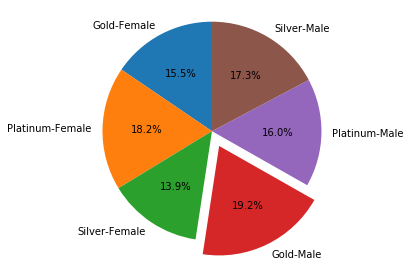

In [23]:
Pie_table=Customer_Claims.groupby(['gender','Segment'])[['claim_amount']].sum().reset_index()

Pie_table['Lable']=Pie_table['gender']

for i in range(0,6):
    Pie_table['Lable'].iloc[i]=Pie_table.Segment.iloc[i]+'-'+Pie_table.gender.iloc[i]
    
Pie_table

print('11. The pie chart between the aggregated value of claim amount based on gender and segment is')

plt.pie(Pie_table['claim_amount'],labels=Pie_table['Lable'],explode=(0, 0, 0, 0.15,0,0),startangle=90,autopct='%1.1f%%')

plt.axis('equal')

plt.tight_layout()
plt.show()

12. It can clearly be said that Males have spent more

   gender  claim_amount
0  Female     2913605.0
1    Male     3683499.0


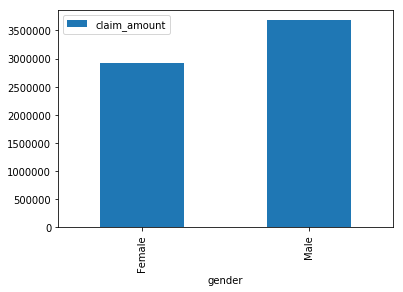

In [24]:
Bar_Table1=Customer_Claims[(Customer_Claims.incident_cause=='Driver error')|(Customer_Claims.incident_cause=='Other driver error')]

Bar_Table2=Bar_Table1.groupby('gender')[['claim_amount']].sum()

print('12. It can clearly be said that Males have spent more\n')
print(Bar_Table2.reset_index())

Bar_Table2.plot.bar()

In [25]:
Customer_Claims.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Categories
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.0,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,1,50.0,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,36.0,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,33.0,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,42.0,Adult


13. It can be seen clearly that Adults do more frauds as compared to any other category

  Age_Categories  fraudulent
0          Youth          57
1          Adult         170


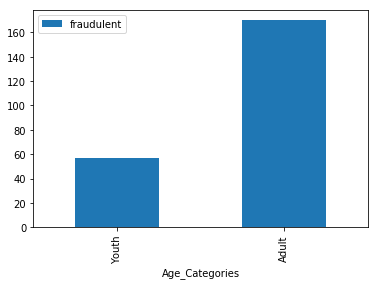

In [26]:
print("13. It can be seen clearly that Adults do more frauds as compared to any other category\n")

print(Customer_Claims[Customer_Claims.fraudulent=='Yes'].groupby('Age_Categories')[['fraudulent']].count().reset_index())

Customer_Claims[Customer_Claims.fraudulent=='Yes'].groupby('Age_Categories')[['fraudulent']].count().plot.bar()

In [27]:
Customer_Claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Categories
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,41.0,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,1,50.0,Adult


14. The monthly trend of the total amount that has been claimed by the customers is 


Text(0, 0.5, 'Claim Amount')

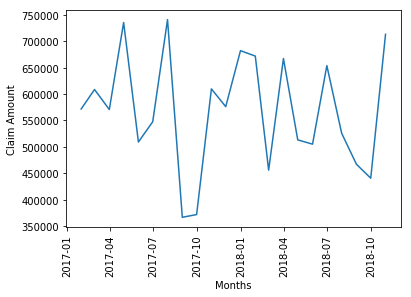

In [28]:
Date_Index_table=Customer_Claims.set_index('claim_date')

Date_Index_table=Date_Index_table.resample('M').sum()

print('14. The monthly trend of the total amount that has been claimed by the customers is ')

plt.plot(Date_Index_table.index,Date_Index_table.claim_amount)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Claim Amount')

In [29]:
df=Customer_Claims.groupby(['fraudulent','Age_Categories','gender'])[['claim_amount']].mean().reset_index()

df

,fraudulent,Age_Categories,gender,claim_amount
0,No,Youth,Female,13096.116505
1,No,Youth,Male,11891.666667
2,No,Adult,Female,12229.144981
3,No,Adult,Male,12123.133803
4,Yes,Youth,Female,7843.851852
5,Yes,Youth,Male,10396.383333
6,Yes,Adult,Female,12001.295455
7,Yes,Adult,Male,16928.420732


15. The average claim amount for gender and age categories based on fraudulent column is 


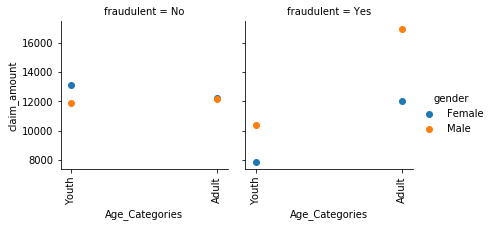

In [30]:
print('15. The average claim amount for gender and age categories based on fraudulent column is ')

g=sns.FacetGrid(df, col="fraudulent", hue="gender")
g.map(plt.scatter, "Age_Categories", "claim_amount")
g.add_legend();
g.set_xticklabels(rotation=90)

In [65]:
Male=Customer_Claims.claim_amount[Customer_Claims.gender=='Male']
Female=Customer_Claims.claim_amount[Customer_Claims.gender=='Female']

print(stats.ttest_ind(a=Male,b=Female,equal_var=False))

print('\n\n16. On performing the Independent T-test on Male and Female population we came accross the conclusion that there is a similarity in the aount claimed by males and female as the P value is not that small so the hypothesis that we had assumed earlier that both are same holds true\n')

print('The mean value of claims for the male is',Male.mean())
print('The mean value of claims for the female is',Female.mean())

Ttest_indResult(statistic=0.8604421397462901, pvalue=0.3897511956543287)


16. On performing the Independent T-test on Male and Female population we came accross the conclusion that there is a similarity in the aount claimed by males and female as the P value is not that small so the hypothesis that we had assumed earlier that both are same holds true

The mean value of claims for the male is 12822.982387475538
The mean value of claims for the female is 12075.133874239351


In [93]:
print('17. As we have two catagorical variables we will use chi square test\n')
      
      
t=pd.crosstab(Customer_Claims.Segment,Customer_Claims.Age_Categories,margins=True)
print(t)

print('\n After Chi test-')
print(stats.chi2_contingency(observed=t))


print('\n The age category is not dependent on the segment as when we did the Chi-square test the P value came out to be not so small so the hypothesis that we had assumend that the two are independet holds true in this case')

17. As we have two catagorical variables we will use chi square test

Age_Categories  Youth  Adult  All
Segment                          
Gold               83    254  337
Platinum          103    235  338
Silver             76    234  310
All               723    262  985

 After Chi test-
(434.60523451620935, 1.0087171951682024e-90, 6, array([[168.5, 168.5, 337. ],
       [169. , 169. , 338. ],
       [155. , 155. , 310. ],
       [492.5, 492.5, 985. ]]))

 The age category is not dependent on the segment as when we did the Chi-square test the P value came out to be not so small so the hypothesis that we had assumend that the two are independet holds true in this case


In [77]:
print("18.  We will be assuming that the Mean of last year is same as the mean of this year and this will be our null hypothesis")

print('Assuming Ho=10000')

print('\n',stats.ttest_1samp(a=Customer_Claims.claim_amount,popmean=10000))

print('\nThe mean for claim amount is',Customer_Claims.claim_amount.mean())

print('\nOn seeing the P value we can very well see that it is very small so the null hypothesis that we assumed earlier doesnot hold true . On calulating the Mean value we can very well see that the mean value of the following year is greater than 10000 so we can conclude that there is a substantial increase')

18.  We will be assuming that the Mean of last year is same as the mean of this year and this will be our null hypothesis
Assuming Ho=10000

 Ttest_1sampResult(statistic=5.648917522935291, pvalue=2.1024491591824085e-08)

The mean for claim amount is 12455.761952191235

On seeing the P value we can very well see that it is very small so the null hypothesis that we assumed earlier doesnot hold true . On calulating the Mean value we can very well see that the mean value of the following year is greater than 10000 so we can conclude that there is a substantial increase


In [94]:
print("19. Since we have a continuous variable and a cotagorical variable with segments so we will be using ANOVA ")

s1=Customer_Claims.claim_amount[Customer_Claims.Age_Categories=='Adult']
s2=Customer_Claims.claim_amount[Customer_Claims.Age_Categories=='Youth']

print('\n',stats.f_oneway(s1,s2))

print('\nAs we can see that P value is not very small the null hypothesis holds true thus we can say that the insurance claim is same for the two Age category')

19. Since we have a continuous variable and a cotagorical variable with segments so we will be using ANOVA 

 F_onewayResult(statistic=0.8452406383830992, pvalue=0.3581277744834458)

As we can see that P value is not very small the null hypothesis holds true thus we can say that the insurance claim is same for the two Age category


In [103]:
print("20. Since we have a continuous variable and a cotagorical variable with segments so we will be using ANOVA ")

s1=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==1]
s2=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==2]
s3=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==3]
s4=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==4]
s5=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==5]
s6=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==6]
s7=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==7]
s8=Customer_Claims.claim_amount[Customer_Claims.total_policy_claims==8]

print('\n',stats.f_oneway(s1,s2,s3,s4,s5,s6,s7,s8))

print('\nAs we can see that P value is not very small the null hypothesis holds true thus we can say that the insurance claim is not dependenat on the number of policy claims as it is simlar in each case')

print('The mean value for each is\n')
print('For 1 policy claim',s1.mean())
print('For 2 policy claim',s2.mean())
print('For 3 policy claim',s3.mean())
print('For 4 policy claim',s4.mean())
print('For 5 policy claim',s5.mean())
print('For 6 policy claim',s6.mean())
print('For 7 policy claim',s7.mean())
print('For 8 policy claim',s8.mean())

20. Since we have a continuous variable and a cotagorical variable with segments so we will be using ANOVA 

 F_onewayResult(statistic=0.9188326327730677, pvalue=0.49084119699808326)

As we can see that P value is not very small the null hypothesis holds true thus we can say that the insurance claim is not dependenat on the number of policy claims as it is simlar in each case
The mean value for each is

For 1 policy claim 12399.175546448087
For 2 policy claim 13932.69
For 3 policy claim 12962.51875
For 4 policy claim 10998.982142857143
For 5 policy claim 8215.26
For 6 policy claim 16056.25
For 7 policy claim 23033.0
For 8 policy claim 3277.5
